In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from tensorflow import keras
from keras import layers

In [3]:
def load_data(file):
    df = pd.read_csv(file)
    df.drop(columns="Unnamed: 0", inplace= True)
    df = df.set_index("Date")
    return df

def plot_val(model,Nsample, xv, yv):
    val_predictions = model.predict(xv).flatten()
    val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':yv})
    plt.plot(val_results['Val Predictions'][:Nsample])
    plt.plot(val_results['Actuals'][:Nsample])
    plt.title("Validation")
    plt.show()
    return val_results
    
def plot_test(model, Nsample, xtt, ytt):
    test_predictions = model.predict(xtt).flatten()
    test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':ytt})
    plt.plot(test_results['Test Predictions'][:Nsample])
    plt.plot(test_results['Actuals'][:Nsample])
    plt.title("Test")
    plt.show()
    return test_results
    
def plot_predictions1(model, X, y, start=0, end=100):
    prediction = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':prediction, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    plt.title("Predictions")
    plt.show()
    return df
    
def load_data_model(epochs):
    x_train = np.load(f"epochs{epochs}/x_train.npy")
    y_train = np.load(f"epochs{epochs}/y_train.npy")
    x_test  = np.load(f"epochs{epochs}/x_test.npy")
    y_test  = np.load(f"epochs{epochs}/y_test.npy")
    x_val   = np.load(f"epochs{epochs}/x_val.npy")
    y_val   = np.load(f"epochs{epochs}/y_val.npy")
    
    return x_train, y_train, x_test, y_test, x_val, y_val

In [4]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

In [5]:
metricsdf = pd.read_csv(f"epochs{epochs}/metricsT.csv", index_col= False)

# DO

## Overall

In [6]:
metricsdf = pd.read_csv(f"../DOmetrics.csv", index_col= False)
metricsdf.drop(columns="index", inplace= True)

In [7]:
metricsdf.head(), metricsdf.tail()

(  Location Metrics Model Category Model         y
 0       S1     MSE        General   CNN  0.018155
 1       S1     MSE        General   RNN  0.018867
 2       S1     MSE        General   GRU  0.016634
 3       S1     MSE        General  LSTM  0.021033
 4       S1     MSE             MA   CNN  0.046931,
     Location Metrics Model Category         Model         y
 443       S4      R2          MA HY  LSTM RNN GRU  0.969788
 444       S4      R2          MA HY   CNN RNN GRU  0.935752
 445       S4      R2          MA HY       CNN GRU  0.954702
 446       S4      R2          MA HY       RNN GRU  0.964151
 447       S4      R2          MA HY      RNN LSTM  0.957611)

In [8]:
rmse = metricsdf[metricsdf['Metrics'].str.contains('RMSE')]
rmse.describe()

,y
count,112.000000
mean,0.148320
std,0.027142
min,0.102678
25%,0.130532
50%,0.144694
75%,0.159616
max,0.242097


In [9]:
rmse = metricsdf[metricsdf['Metrics'].str.contains('RMSE')]
mse = metricsdf[metricsdf['Metrics'].str.contains('MSE')]
mae = metricsdf[metricsdf['Metrics'].str.contains('MAE')]
r2 = metricsdf[metricsdf['Metrics'].str.contains('R2')]

             Location Metrics Model Category         y
Model                                                 
CNN                S1    RMSE           DReg  0.126587
CNN GRU            S1    RMSE             HY  0.114931
CNN LSTM           S1    RMSE             HY  0.110984
CNN RNN GRU        S1    RMSE             HY  0.119121
GRU                S1    RMSE           DReg  0.110665
LSTM               S1    RMSE           DReg  0.124381
LSTM RNN GRU       S1    RMSE             HY  0.119020
RNN                S1    RMSE           DReg  0.102678
RNN GRU            S1    RMSE             HY  0.110036
RNN LSTM           S1    RMSE             HY  0.114018


<AxesSubplot:xlabel='Model'>

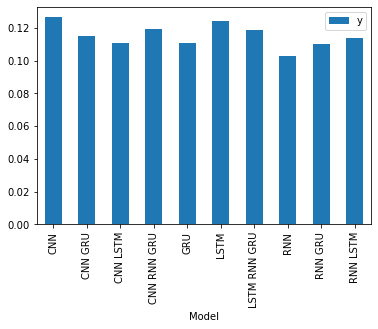

In [10]:
print(rmse.groupby(["Model"]).min())
rmse.groupby(["Model"]).min().plot(kind= "bar")

### RNN GRU 0.116

In [11]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

2024-04-11 22:31:22.776168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-11 22:31:22.776204: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-11 22:31:22.776230: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-04-11 22:31:22.776750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3/3 [==============================] - 1s 5ms/step


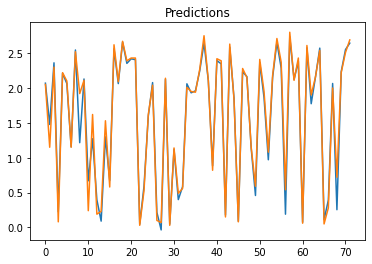

In [12]:
model = load_model(f"epochs{epochs}/hybrid_rnn_gru/")
rnn_gru = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU 0.117

3/3 [==============================] - 1s 5ms/step


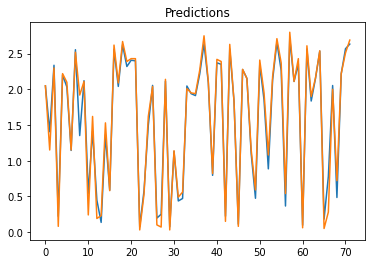

In [13]:
model = load_model(f"epochs{epochs}/hybrid_lstm_rnn_gru/")
lstm_rnn_gru = plot_predictions1(model, x_test, y_test)

### RNN 0.120

3/3 [==============================] - 0s 2ms/step


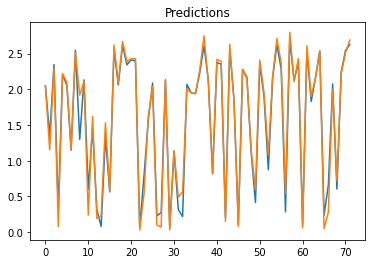

In [14]:
model = load_model(f"epochs{epochs}/auto_rnn/")
auto_rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.123

3/3 [==============================] - 0s 3ms/step


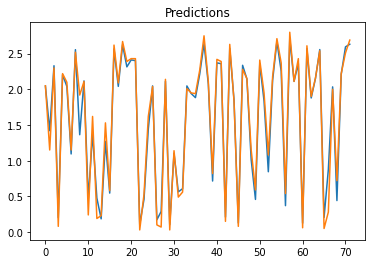

In [15]:
model = load_model(f"epochs{epochs}/auto_lstm/")
auto_lstm = plot_predictions1(model, x_test, y_test)

In [16]:
rnn_gru

,Predictions,Actuals
0,2.069141,2.05
1,1.476589,1.15
2,2.361398,2.30
3,0.224294,0.08
4,2.210305,2.22
...,...,...
67,2.065091,2.00
68,0.254055,0.72
69,2.233912,2.22
70,2.551061,2.51


In [17]:
df = pd.DataFrame()
df["RNN GRU P"] = rnn_gru["Predictions"]
df["LSTM RNN GRU P"] = lstm_rnn_gru["Predictions"]
df["DReg RNN P"] = auto_rnn["Predictions"]
df["DReg LSTM P"] = auto_lstm["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

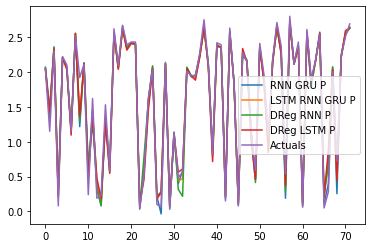

In [18]:
df.plot()

In [20]:
df.to_csv("../prediction/DOoverall.csv", index= False)

## Moving Average

In [21]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('MA')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]

             Location Metrics Model Category         y
Model                                                 
CNN                S1    RMSE             MA  0.134880
CNN GRU            S1    RMSE          MA HY  0.122531
CNN LSTM           S1    RMSE          MA HY  0.140507
CNN RNN GRU        S1    RMSE          MA HY  0.177113
GRU                S1    RMSE             MA  0.112243
LSTM               S1    RMSE             MA  0.125045
LSTM RNN GRU       S1    RMSE          MA HY  0.137529
RNN                S1    RMSE             MA  0.129064
RNN GRU            S1    RMSE          MA HY  0.147139
RNN LSTM           S1    RMSE          MA HY  0.149242


<AxesSubplot:xlabel='Model'>

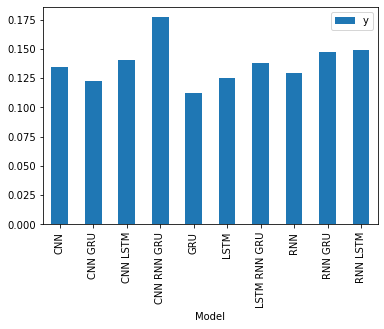

In [22]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN GRU 0.178

In [23]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

3/3 [==============================] - 0s 4ms/step


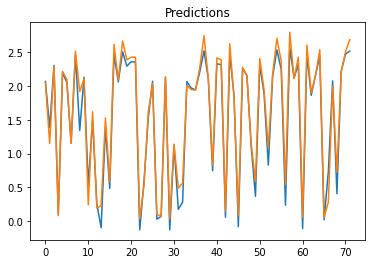

In [24]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_gru/")
rnn_gru = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU 0.2901

3/3 [==============================] - 1s 5ms/step


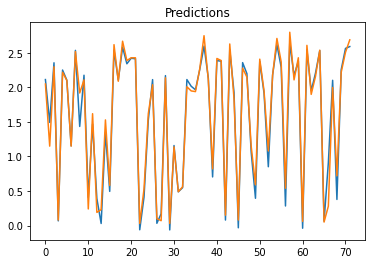

In [25]:
model = load_model(f"epochs{epochs}/mavg_hybrid_lstm_rnn_gru/")
lstm_rnn_gru = plot_predictions1(model, x_test, y_test)

### RNN 0.198

3/3 [==============================] - 0s 2ms/step


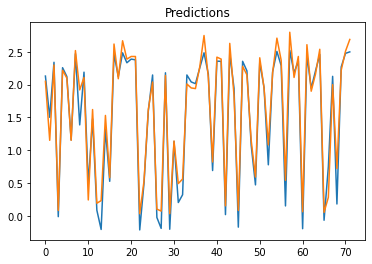

In [26]:
model = load_model(f"epochs{epochs}/mavg_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### RNN LSTM 0.26

3/3 [==============================] - 0s 3ms/step


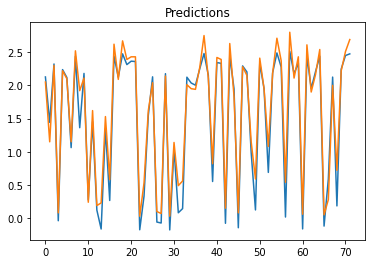

In [27]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_lstm/")
rnn_lstm = plot_predictions1(model, x_test, y_test)

In [28]:
df = pd.DataFrame()
df["MA HY RNN GRU"] = rnn_gru["Predictions"]
df["MA HY LSTM RNN GRU"] = lstm_rnn_gru["Predictions"]
df["MA HY RNN LSTM"] = rnn_lstm["Predictions"]
df["MA RNN"] = rnn["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

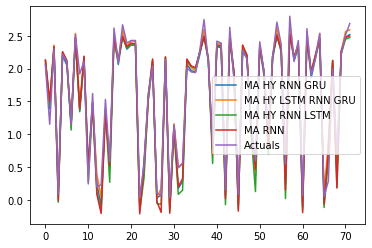

In [29]:
df.plot()

In [30]:
df.to_csv("../prediction/DOmavg.csv", index= False)

## DReg 

In [31]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('DReg')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]

In [32]:
mvgdf.head()

,Location,Metrics,Model Category,Model,y
120,S1,RMSE,DReg,CNN,0.145901
121,S1,RMSE,DReg,RNN,0.140956
122,S1,RMSE,DReg,GRU,0.126652
123,S1,RMSE,DReg,LSTM,0.143594
124,S1,RMSE,MA DReg,CNN,0.153989


      Location Metrics Model Category         y
Model                                          
CNN         S1    RMSE           DReg  0.126587
GRU         S1    RMSE           DReg  0.110665
LSTM        S1    RMSE           DReg  0.125590
RNN         S1    RMSE           DReg  0.102678


<AxesSubplot:xlabel='Model'>

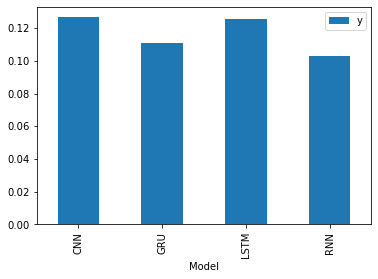

In [33]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN 0.120

3/3 [==============================] - 0s 2ms/step


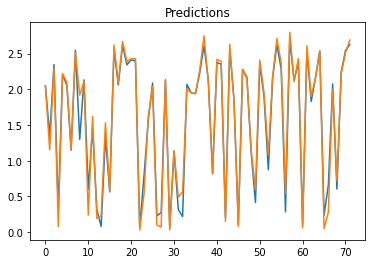

In [34]:
model = load_model(f"epochs{epochs}/auto_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.123

3/3 [==============================] - 0s 3ms/step


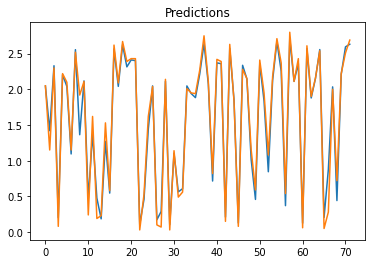

In [35]:
model = load_model(f"epochs{epochs}/auto_lstm/")
lstm = plot_predictions1(model, x_test, y_test)

### GRU 0.125

3/3 [==============================] - 0s 4ms/step


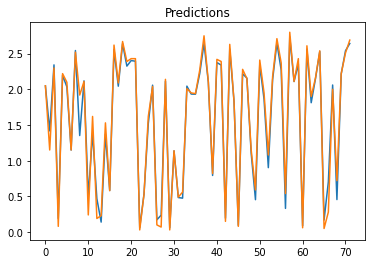

In [36]:
model = load_model(f"epochs{epochs}/auto_gru/")
gru = plot_predictions1(model, x_test, y_test)

In [37]:
df = pd.DataFrame()
df["DReg RNN"] = rnn["Predictions"]
df["Dreg LSTM"] = lstm["Predictions"]
df["Dreg GRU"] = gru["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

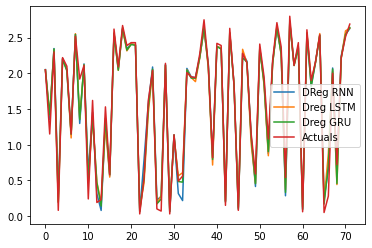

In [38]:
df.plot()

In [39]:
df.to_csv("../prediction/DOdreg.csv", index= False)

## MA DReg 

In [40]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('DReg')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]
mvgdf = mvgdf[mvgdf['Model Category'].str.contains('MA DReg')]

In [41]:
mvgdf.head()

,Location,Metrics,Model Category,Model,y
124,S1,RMSE,MA DReg,CNN,0.153989
125,S1,RMSE,MA DReg,RNN,0.173943
126,S1,RMSE,MA DReg,GRU,0.128841
127,S1,RMSE,MA DReg,LSTM,0.147882
152,S2,RMSE,MA DReg,CNN,0.159579


      Location Metrics Model Category         y
Model                                          
CNN         S1    RMSE        MA DReg  0.134880
GRU         S1    RMSE        MA DReg  0.117608
LSTM        S1    RMSE        MA DReg  0.136729
RNN         S1    RMSE        MA DReg  0.129064


<AxesSubplot:xlabel='Model'>

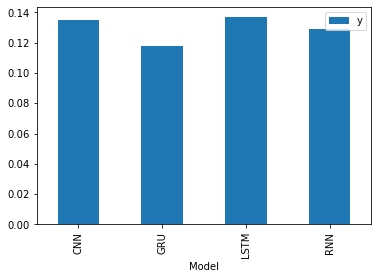

In [42]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN 0.317

3/3 [==============================] - 0s 3ms/step


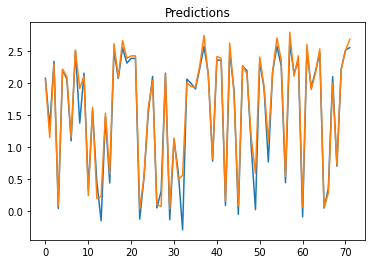

In [43]:
model = load_model(f"epochs{epochs}/mavg_auto_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.362

3/3 [==============================] - 0s 3ms/step


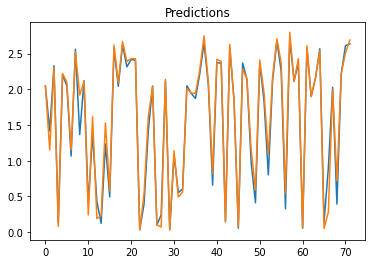

In [44]:
model = load_model(f"epochs{epochs}/mavg_auto_lstm/")
lstm = plot_predictions1(model, x_test, y_test)

### GRU 0.343

3/3 [==============================] - 0s 3ms/step


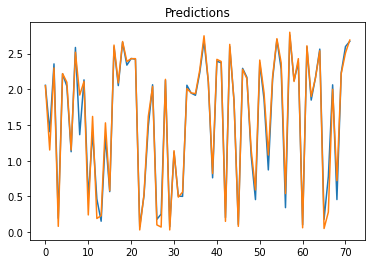

In [45]:
model = load_model(f"epochs{epochs}/mavg_auto_gru/")
gru = plot_predictions1(model, x_test, y_test)

In [46]:
df = pd.DataFrame()
df["MA DReg RNN"] = rnn["Predictions"]
df["MA Dreg LSTM"] = lstm["Predictions"]
df["MA Dreg GRU"] = gru["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

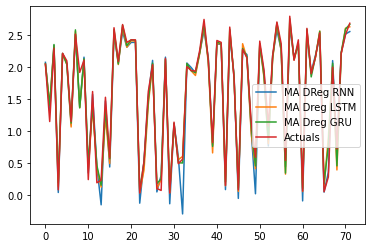

In [47]:
df.plot()

In [48]:
df.to_csv("../prediction/DOmadreg.csv", index= False)

In [49]:
ov = pd.read_csv("../prediction/DOoverall.csv", index_col= False)
mvg = pd.read_csv("../prediction/DOmavg.csv", index_col= False)
dreg = pd.read_csv("../prediction/DOdreg.csv", index_col= False)
mvgdreg = pd.read_csv("../prediction/DOmadreg.csv", index_col= False)

In [50]:
ov.columns = ['OV RNN GRU', 'OV LSTM RNN GRU', 'OV DReg RNN', ' OV DReg LSTM', 'Actuals']

In [51]:
mvgdreg.columns

Index(['MA DReg RNN', 'MA Dreg LSTM', 'MA Dreg GRU', 'Actuals'], dtype='object')

In [52]:
df = ov[['OV RNN GRU', 'OV LSTM RNN GRU', 'OV DReg RNN', ' OV DReg LSTM']]
df[['MA HY RNN GRU', 'MA HY LSTM RNN GRU', 'MA HY RNN LSTM', 'MA RNN']] = mvg[['MA HY RNN GRU', 'MA HY LSTM RNN GRU', 'MA HY RNN LSTM', 'MA RNN']]
df[['DReg RNN', 'Dreg LSTM', 'Dreg GRU']] = dreg[['DReg RNN', 'Dreg LSTM', 'Dreg GRU']]
df[['MA DReg RNN', 'MA Dreg LSTM', 'MA Dreg GRU', "Actuals"]] = mvgdreg[['MA DReg RNN', 'MA Dreg LSTM', 'MA Dreg GRU', "Actuals"]]
df.head()

,OV RNN GRU,OV LSTM RNN GRU,OV DReg RNN,OV DReg LSTM,MA HY RNN GRU,MA HY LSTM RNN GRU,MA HY RNN LSTM,MA RNN,DReg RNN,Dreg LSTM,Dreg GRU,MA DReg RNN,MA Dreg LSTM,MA Dreg GRU,Actuals
0,2.069141,2.048387,2.052426,2.045549,2.070481,2.114433,2.126655,2.130885,2.052426,2.045549,2.047882,2.077458,2.045985,2.056841,2.05
1,1.476589,1.405606,1.352460,1.420126,1.385694,1.494142,1.442796,1.501260,1.352460,1.420126,1.417407,1.315671,1.415099,1.405910,1.15
2,2.361398,2.337295,2.347496,2.330905,2.307687,2.357567,2.321932,2.341477,2.347496,2.330905,2.342654,2.343265,2.331295,2.356804,2.30
3,0.224294,0.221314,0.306406,0.200859,0.107647,0.067256,-0.038695,-0.015152,0.306406,0.200859,0.190064,0.037950,0.129121,0.193434,0.08
4,2.210305,2.202005,2.211622,2.204756,2.201922,2.252549,2.237306,2.258938,2.211622,2.204756,2.196618,2.213434,2.209315,2.217479,2.22


In [53]:
df.columns = ['OV RNN GRU', 'OV LSTM RNN GRU', 'OV DReg RNN', ' OV DReg LSTM',
       'MA HY RNN GRU', 'MA HY LSTM RNN GRU', 'MA HY RNN LSTM', 'MA RNN',
       'DReg RNN', 'DReg LSTM', 'DReg GRU', 'MA DReg RNN', 'MA DReg LSTM',
       'MA DReg GRU', 'Actuals']

In [54]:
df.to_csv("../prediction/DOBest.csv")

# BOD

## Overall

In [55]:
metricsdf = pd.read_csv(f"../BODmetrics.csv", index_col= False)
metricsdf.drop(columns="index", inplace= True)

In [56]:
metricsdf.head(), metricsdf.tail()

(  Location Metrics Model Category Model          y
 0       S1     MSE        General   CNN   0.562573
 1       S1     MSE        General   RNN  82.271523
 2       S1     MSE        General   GRU  61.077115
 3       S1     MSE        General  LSTM  25.847685
 4       S1     MSE             MA   CNN   0.749675,
     Location Metrics Model Category         Model         y
 443       S4      R2          MA HY  LSTM RNN GRU -1.315216
 444       S4      R2          MA HY   CNN RNN GRU -0.029142
 445       S4      R2          MA HY       CNN GRU -8.926427
 446       S4      R2          MA HY       RNN GRU -9.098673
 447       S4      R2          MA HY      RNN LSTM -8.294023)

In [57]:
rmse = metricsdf[metricsdf['Metrics'].str.contains('RMSE')]
rmse.describe()

,y
count,112.000000
mean,9.009683
std,5.228474
min,0.717287
25%,5.372756
50%,8.333848
75%,14.873518
max,17.102445


In [58]:
rmse = metricsdf[metricsdf['Metrics'].str.contains('RMSE')]
mse = metricsdf[metricsdf['Metrics'].str.contains('MSE')]
mae = metricsdf[metricsdf['Metrics'].str.contains('MAE')]
r2 = metricsdf[metricsdf['Metrics'].str.contains('R2')]

             Location Metrics Model Category          y
Model                                                  
CNN                S1    RMSE           DReg   0.717287
CNN GRU            S1    RMSE             HY  14.863861
CNN LSTM           S1    RMSE             HY  14.373792
CNN RNN GRU        S1    RMSE             HY   5.282585
GRU                S1    RMSE           DReg   7.020469
LSTM               S1    RMSE           DReg   1.466987
LSTM RNN GRU       S1    RMSE             HY   6.845477
RNN                S1    RMSE           DReg   8.797198
RNN GRU            S1    RMSE             HY  15.148251
RNN LSTM           S1    RMSE             HY  14.533045


<AxesSubplot:xlabel='Model'>

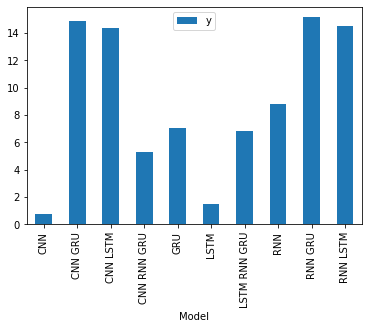

In [59]:
print(rmse.groupby(["Model"]).min())
rmse.groupby(["Model"]).min().plot(kind= "bar")

### RNN GRU 0.116

In [60]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

3/3 [==============================] - 0s 3ms/step


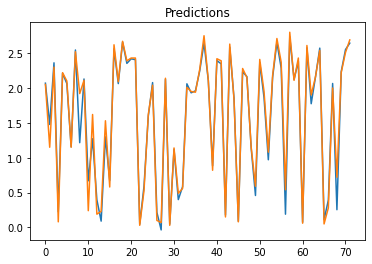

In [61]:
model = load_model(f"epochs{epochs}/hybrid_rnn_gru/")
rnn_gru = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU 0.117

3/3 [==============================] - 1s 5ms/step


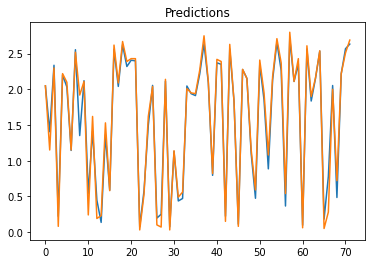

In [62]:
model = load_model(f"epochs{epochs}/hybrid_lstm_rnn_gru/")
lstm_rnn_gru = plot_predictions1(model, x_test, y_test)

### RNN 0.120

3/3 [==============================] - 0s 2ms/step


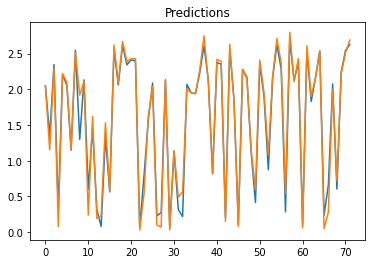

In [63]:
model = load_model(f"epochs{epochs}/auto_rnn/")
auto_rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.123

3/3 [==============================] - 0s 3ms/step


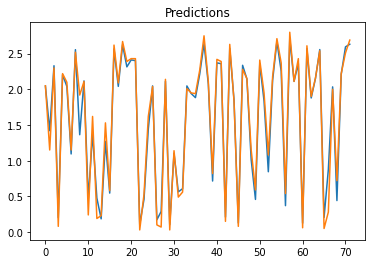

In [64]:
model = load_model(f"epochs{epochs}/auto_lstm/")
auto_lstm = plot_predictions1(model, x_test, y_test)

In [65]:
rnn_gru

,Predictions,Actuals
0,2.069141,2.05
1,1.476589,1.15
2,2.361398,2.30
3,0.224294,0.08
4,2.210305,2.22
...,...,...
67,2.065091,2.00
68,0.254055,0.72
69,2.233912,2.22
70,2.551061,2.51


In [66]:
df = pd.DataFrame()
df["RNN GRU P"] = rnn_gru["Predictions"]
df["LSTM RNN GRU P"] = lstm_rnn_gru["Predictions"]
df["DReg RNN P"] = auto_rnn["Predictions"]
df["DReg LSTM P"] = auto_lstm["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

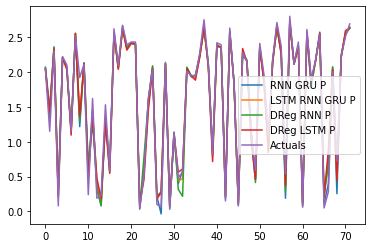

In [67]:
df.plot()

In [68]:
df.to_csv("../prediction/BODoverall.csv", index= False)

## Moving Average

In [69]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('MA')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]

             Location Metrics Model Category          y
Model                                                  
CNN                S1    RMSE             MA   0.717287
CNN GRU            S1    RMSE          MA HY  15.750354
CNN LSTM           S1    RMSE          MA HY  16.012320
CNN RNN GRU        S1    RMSE          MA HY   5.282585
GRU                S1    RMSE             MA   8.089698
LSTM               S1    RMSE             MA   5.316664
LSTM RNN GRU       S1    RMSE          MA HY   7.876018
RNN                S1    RMSE             MA  10.516052
RNN GRU            S1    RMSE          MA HY  16.547827
RNN LSTM           S1    RMSE          MA HY  15.462722


<AxesSubplot:xlabel='Model'>

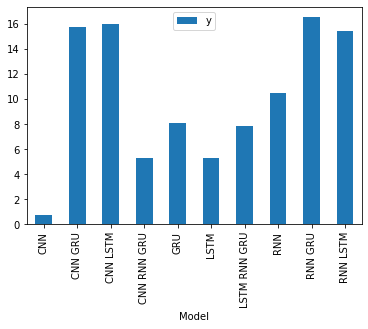

In [70]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN GRU 0.178

In [71]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

3/3 [==============================] - 0s 4ms/step


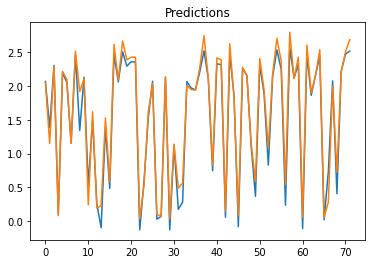

In [72]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_gru/")
rnn_gru = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU 0.2901

3/3 [==============================] - 1s 5ms/step


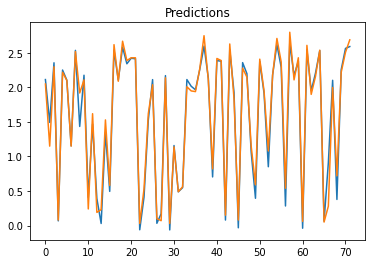

In [73]:
model = load_model(f"epochs{epochs}/mavg_hybrid_lstm_rnn_gru/")
lstm_rnn_gru = plot_predictions1(model, x_test, y_test)

### RNN 0.198

3/3 [==============================] - 0s 2ms/step


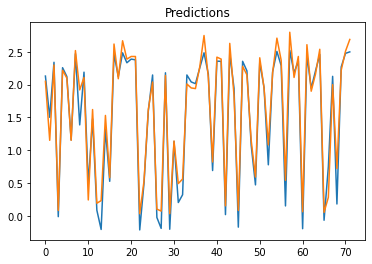

In [74]:
model = load_model(f"epochs{epochs}/mavg_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### RNN LSTM 0.26

3/3 [==============================] - 0s 4ms/step


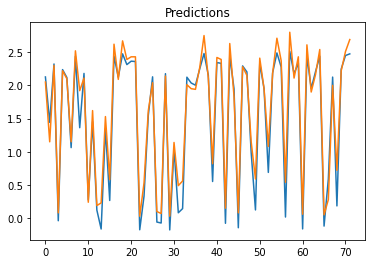

In [75]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_lstm/")
rnn_lstm = plot_predictions1(model, x_test, y_test)

In [76]:
df = pd.DataFrame()
df["MA HY RNN GRU"] = rnn_gru["Predictions"]
df["MA HY LSTM RNN GRU"] = lstm_rnn_gru["Predictions"]
df["MA HY RNN LSTM"] = rnn_lstm["Predictions"]
df["MA RNN"] = rnn["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

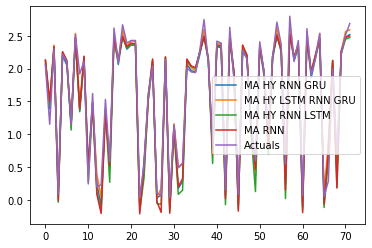

In [77]:
df.plot()

In [78]:
df.to_csv("../prediction/BODmavg.csv", index= False)

## DReg 

In [79]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('DReg')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]

In [80]:
mvgdf.head()

,Location,Metrics,Model Category,Model,y
120,S1,RMSE,DReg,CNN,0.737127
121,S1,RMSE,DReg,RNN,10.284959
122,S1,RMSE,DReg,GRU,7.602599
123,S1,RMSE,DReg,LSTM,1.466987
124,S1,RMSE,MA DReg,CNN,0.757037


      Location Metrics Model Category         y
Model                                          
CNN         S1    RMSE           DReg  0.717287
GRU         S1    RMSE           DReg  7.602599
LSTM        S1    RMSE           DReg  1.466987
RNN         S1    RMSE           DReg  9.070073


<AxesSubplot:xlabel='Model'>

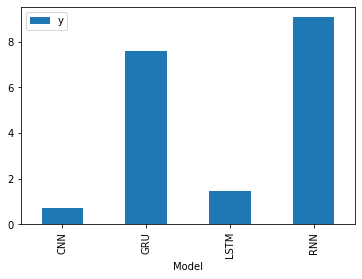

In [81]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN 0.120

3/3 [==============================] - 0s 2ms/step


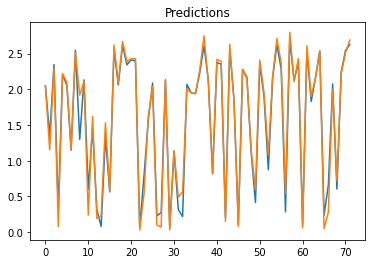

In [82]:
model = load_model(f"epochs{epochs}/auto_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.123

3/3 [==============================] - 0s 3ms/step


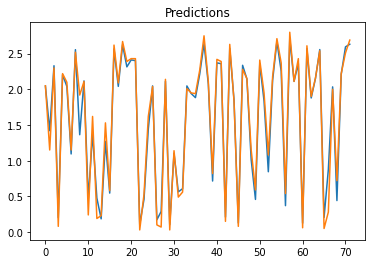

In [83]:
model = load_model(f"epochs{epochs}/auto_lstm/")
lstm = plot_predictions1(model, x_test, y_test)

### GRU 0.125

3/3 [==============================] - 0s 3ms/step


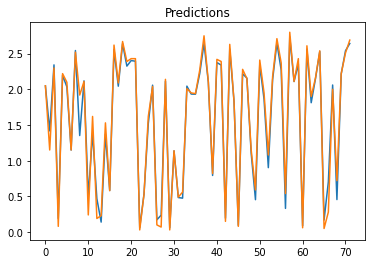

In [84]:
model = load_model(f"epochs{epochs}/auto_gru/")
gru = plot_predictions1(model, x_test, y_test)

In [85]:
df = pd.DataFrame()
df["DReg RNN"] = rnn["Predictions"]
df["Dreg LSTM"] = lstm["Predictions"]
df["Dreg GRU"] = gru["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

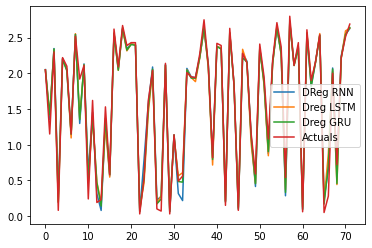

In [86]:
df.plot()

In [87]:
df.to_csv("../prediction/BODdreg.csv", index= False)

## MA DReg 

In [88]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('DReg')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]
mvgdf = mvgdf[mvgdf['Model Category'].str.contains('MA DReg')]

In [89]:
mvgdf.head()

,Location,Metrics,Model Category,Model,y
124,S1,RMSE,MA DReg,CNN,0.757037
125,S1,RMSE,MA DReg,RNN,10.720578
126,S1,RMSE,MA DReg,GRU,9.227382
127,S1,RMSE,MA DReg,LSTM,7.488939
152,S2,RMSE,MA DReg,CNN,0.898554


      Location Metrics Model Category          y
Model                                           
CNN         S1    RMSE        MA DReg   0.717287
GRU         S1    RMSE        MA DReg   8.089698
LSTM        S1    RMSE        MA DReg   7.488939
RNN         S1    RMSE        MA DReg  10.701937


<AxesSubplot:xlabel='Model'>

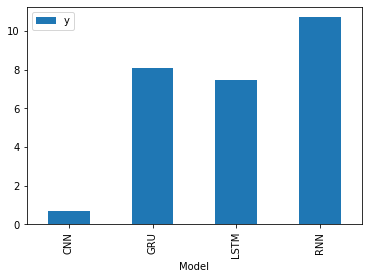

In [90]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN 0.317

3/3 [==============================] - 0s 2ms/step


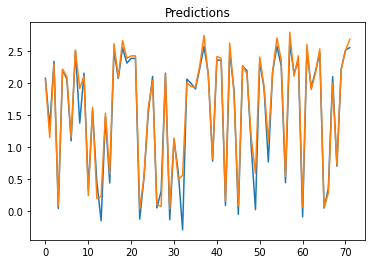

In [91]:
model = load_model(f"epochs{epochs}/mavg_auto_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.362

3/3 [==============================] - 0s 3ms/step


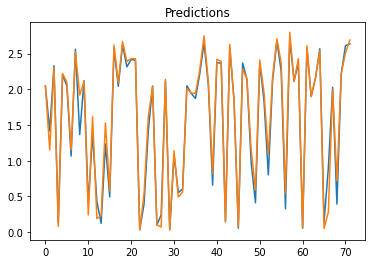

In [92]:
model = load_model(f"epochs{epochs}/mavg_auto_lstm/")
lstm = plot_predictions1(model, x_test, y_test)

### GRU 0.343

3/3 [==============================] - 0s 3ms/step


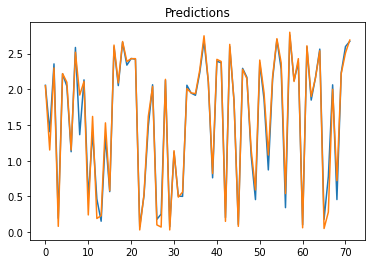

In [93]:
model = load_model(f"epochs{epochs}/mavg_auto_gru/")
gru = plot_predictions1(model, x_test, y_test)

In [94]:
df = pd.DataFrame()
df["MA DReg RNN"] = rnn["Predictions"]
df["MA Dreg LSTM"] = lstm["Predictions"]
df["MA Dreg GRU"] = gru["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

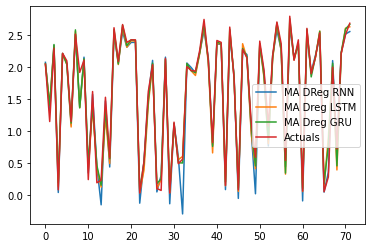

In [95]:
df.plot()

In [96]:
df.to_csv("../prediction/BODmadreg.csv", index= False)

In [97]:
ov = pd.read_csv("../prediction/BODoverall.csv", index_col= False)
mvg = pd.read_csv("../prediction/BODmavg.csv", index_col= False)
dreg = pd.read_csv("../prediction/BODdreg.csv", index_col= False)
mvgdreg = pd.read_csv("../prediction/BODmadreg.csv", index_col= False)

In [98]:
df = pd.concat([ov, mvg, dreg, mvgdreg], axis=1)
df.head()

,RNN GRU P,LSTM RNN GRU P,DReg RNN P,DReg LSTM P,Actuals,MA HY RNN GRU,MA HY LSTM RNN GRU,MA HY RNN LSTM,MA RNN,Actuals,DReg RNN,Dreg LSTM,Dreg GRU,Actuals,MA DReg RNN,MA Dreg LSTM,MA Dreg GRU,Actuals
0,2.069141,2.048387,2.052426,2.045549,2.05,2.070481,2.114433,2.126655,2.130885,2.05,2.052426,2.045549,2.047882,2.05,2.077458,2.045985,2.056841,2.05
1,1.476589,1.405606,1.352460,1.420126,1.15,1.385694,1.494142,1.442796,1.501260,1.15,1.352460,1.420126,1.417407,1.15,1.315671,1.415099,1.405910,1.15
2,2.361398,2.337295,2.347496,2.330905,2.30,2.307687,2.357567,2.321932,2.341477,2.30,2.347496,2.330905,2.342654,2.30,2.343265,2.331295,2.356804,2.30
3,0.224294,0.221314,0.306406,0.200859,0.08,0.107647,0.067256,-0.038695,-0.015152,0.08,0.306406,0.200859,0.190064,0.08,0.037950,0.129121,0.193434,0.08
4,2.210305,2.202005,2.211622,2.204756,2.22,2.201922,2.252549,2.237306,2.258938,2.22,2.211622,2.204756,2.196618,2.22,2.213434,2.209315,2.217479,2.22


In [99]:
df.columns = ['OV RNN GRU', 'OV LSTM RNN GRU', 'OV DReg RNN', 'OV DReg LSTM', 'Actuals',
       'MA HY RNN GRU', 'MA HY LSTM RNN GRU', 'MA HY RNN LSTM', 'MA RNN',
       'Actuals', 'DReg RNN', 'Dreg LSTM', 'Dreg GRU', 'Actuals',
       'MA DReg RNN', 'MA Dreg LSTM', 'MA Dreg GRU', 'Actuals']

In [100]:
df = df.drop(columns= "Actuals")
df.head()

,OV RNN GRU,OV LSTM RNN GRU,OV DReg RNN,OV DReg LSTM,MA HY RNN GRU,MA HY LSTM RNN GRU,MA HY RNN LSTM,MA RNN,DReg RNN,Dreg LSTM,Dreg GRU,MA DReg RNN,MA Dreg LSTM,MA Dreg GRU
0,2.069141,2.048387,2.052426,2.045549,2.070481,2.114433,2.126655,2.130885,2.052426,2.045549,2.047882,2.077458,2.045985,2.056841
1,1.476589,1.405606,1.352460,1.420126,1.385694,1.494142,1.442796,1.501260,1.352460,1.420126,1.417407,1.315671,1.415099,1.405910
2,2.361398,2.337295,2.347496,2.330905,2.307687,2.357567,2.321932,2.341477,2.347496,2.330905,2.342654,2.343265,2.331295,2.356804
3,0.224294,0.221314,0.306406,0.200859,0.107647,0.067256,-0.038695,-0.015152,0.306406,0.200859,0.190064,0.037950,0.129121,0.193434
4,2.210305,2.202005,2.211622,2.204756,2.201922,2.252549,2.237306,2.258938,2.211622,2.204756,2.196618,2.213434,2.209315,2.217479


In [101]:
df["Actuals"] = ov["Actuals"]

In [102]:
df.to_csv("../prediction/BODBest.csv")

             Location Metrics Model Category          y
Model                                                  
CNN                S4    RMSE        MA DReg   1.009876
CNN GRU            S4    RMSE          MA HY  16.618529
CNN LSTM           S4    RMSE          MA HY  17.012974
CNN RNN GRU        S4    RMSE          MA HY   5.598195
GRU                S4    RMSE        MA DReg   9.814565
LSTM               S4    RMSE        MA DReg   9.386719
LSTM RNN GRU       S4    RMSE          MA HY   8.255575
RNN                S4    RMSE        MA DReg  11.417251
RNN GRU            S4    RMSE          MA HY  17.102445
RNN LSTM           S4    RMSE          MA HY  16.587424


<AxesSubplot:xlabel='Model'>

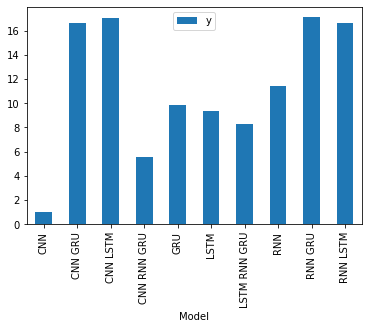

In [103]:
print(rmse.groupby(["Model"]).max())
rmse.groupby(["Model"]).max().plot(kind= "bar")